In [1]:
import pynamical
from pynamical import simulate, save_fig, phase_diagram, phase_diagram_3d
import pandas as pd, numpy as np, matplotlib.pyplot as plt, IPython.display as IPdisplay
%matplotlib inline

In [2]:
title_font = pynamical.get_title_font()
label_font = pynamical.get_label_font()

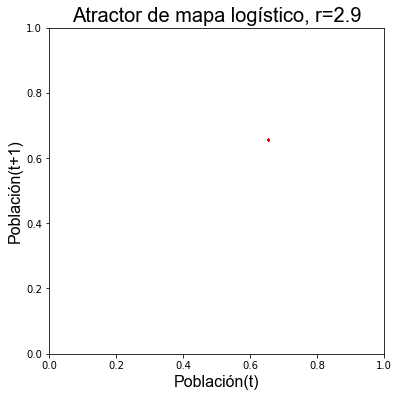

In [3]:
# draw a phase diagram for 100 generations for the growth rate parameter 2.9
# it shows points converging on 0.655 because the logistic map has a fixed-point attractor at 0.655 when r=2.9
pops = simulate(num_gens=100, rate_min=2.9, num_rates=1, num_discard=100)
phase_diagram(pops, title='Atractor de mapa logístico, r=2.9', size=20, color='r', xlabel='Población(t)', ylabel='Población(t+1)')

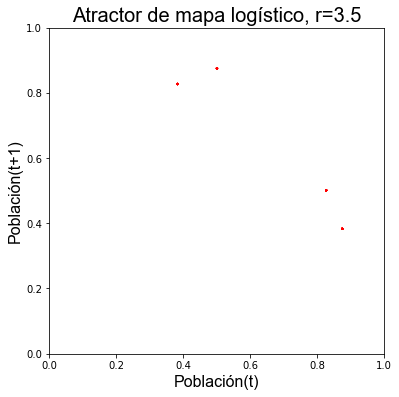

In [4]:
# draw a phase diagram for 100 generations for the growth rate parameter 3.5
# it shows 4 points because the logistic map has a period of 4 when r=3.5
pops = simulate(num_gens=100, rate_min=3.5, num_rates=1, num_discard=100)
phase_diagram(pops, title='Atractor de mapa logístico, r=3.5', size=20, color='r', xlabel='Población(t)', ylabel='Población(t+1)')

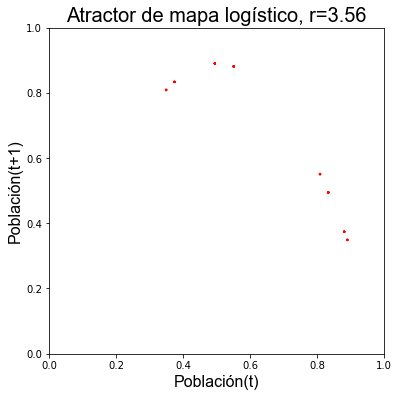

In [5]:
# draw a phase diagram for 100 generations for the growth rate parameter 3.56
# it shows 8 points because the logistic map has a period of 8 when r=3.56
pops = simulate(num_gens=100, rate_min=3.56, num_rates=1, num_discard=100)
phase_diagram(pops, title='Atractor de mapa logístico, r=3.56', size=20, color='r', xlabel='Población(t)', ylabel='Población(t+1)')

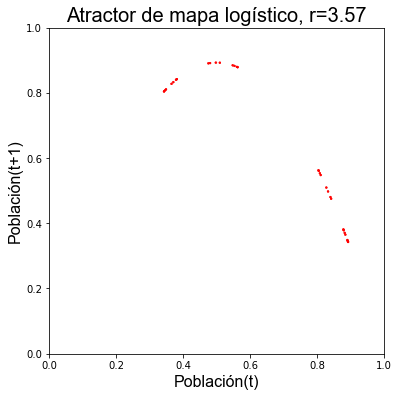

In [6]:
# draw a phase diagram for 100 generations for the growth rate parameter 3.57
# it shows n points because the logistic map has a period of n when r=3.57
pops = simulate(num_gens=100, rate_min=3.57, num_rates=1, num_discard=100)
phase_diagram(pops, title='Atractor de mapa logístico, r=3.57', size=20, color='r', xlabel='Población(t)', ylabel='Población(t+1)')

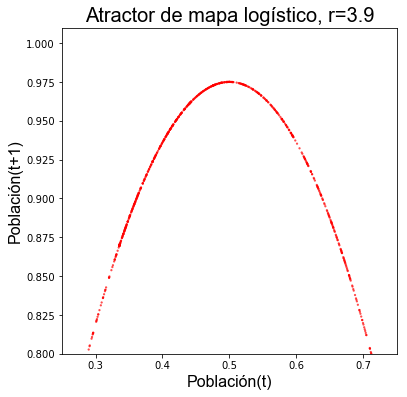

In [7]:
# draw a phase diagram for 2,000 generations for the growth rate parameter 3.9
# the plot reveals the strange attractor - the logistic map is chaotic when r=3.9
pops = simulate(num_gens=2000, rate_min=3.9, num_rates=1)
phase_diagram(pops, xmin=0.25, xmax=0.75, ymin=0.8, ymax=1.01, size=20, title='Atractor de mapa logístico, r=3.9', color='r',
             xlabel='Población(t)', ylabel='Población(t+1)')

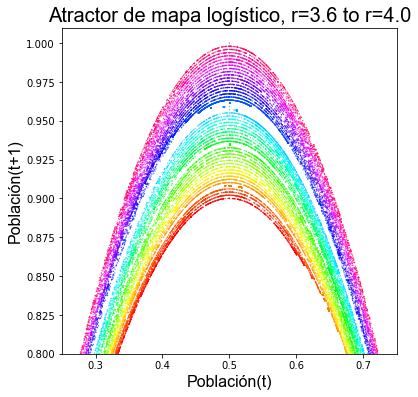

In [8]:
# draw a phase diagram for 2,000 generations across 50 growth rate steps from 3.6 to 4.0
# each chaotic growth rate has its own parabola
pops = simulate(num_gens=2000, rate_min=3.6, rate_max=4.0, num_rates=50)
phase_diagram(pops, xmin=0.25, xmax=0.75, ymin=0.8, ymax=1.01, size=7, 
              title='Atractor de mapa logístico, r=3.6 to r=4.0', color='hsv', xlabel='Población(t)', ylabel='Población(t+1)')

In [9]:
# sometimes it is hard to tell if a time series is chaotic or random
# generate two time series of 1,000 steps, one chaotic and one random
# generate 30,000 time steps for the chaotic series but only keep the final 1,000 (when system is fully evolved)
total_gens = 30000
gens = 1000
np.random.seed(1)

chaos_pops = simulate(num_gens=total_gens, rate_min=3.99, num_rates=1)
chaos_pops = chaos_pops.iloc[total_gens-gens:].reset_index().drop(labels='index', axis=1)

random_pops = pd.DataFrame(np.random.random(gens), columns=['value'])
time_series = pd.concat([chaos_pops, random_pops], axis=1)
time_series.columns = ['chaos', 'random']
time_series.head()

,chaos,random
0,0.900520,0.417022
1,0.357438,0.720324
2,0.916407,0.000114
3,0.305654,0.302333
4,0.846796,0.146756


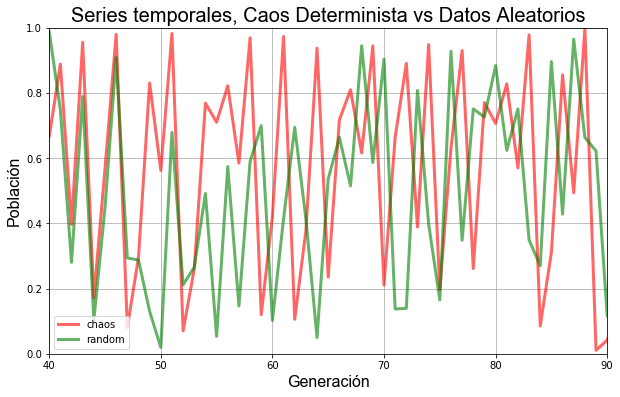

In [10]:
# plot the chaotic and random time series to show how they are sometimes tough to differentiate
ax = time_series.plot(kind='line', figsize=[10, 6], linewidth=3, alpha=0.6, style=['r','g'])
ax.grid(True)
ax.set_xlim(40, 90)
ax.set_ylim(0, 1)
ax.set_title('Series temporales, Caos Determinista vs Datos Aleatorios', fontproperties=title_font)
ax.set_xlabel('Generación', fontproperties=label_font)
ax.set_ylabel('Población', fontproperties=label_font)
ax.legend(loc=3)

save_fig('chaos-vs-random-line')
plt.show()

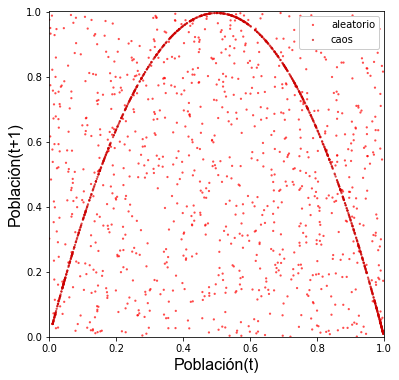

In [12]:
# plot same data as 2D phase diagram instead
pops = pd.concat([chaos_pops, random_pops], axis=1)
pops.columns = ['caos', 'aleatorio']
phase_diagram(pops, size=20, color=['r','#cc0000'], ymax=1.005, legend=True, 
              filename='logistic-attractor-chaos-random',  xlabel='Población(t)', ylabel='Población(t+1)')

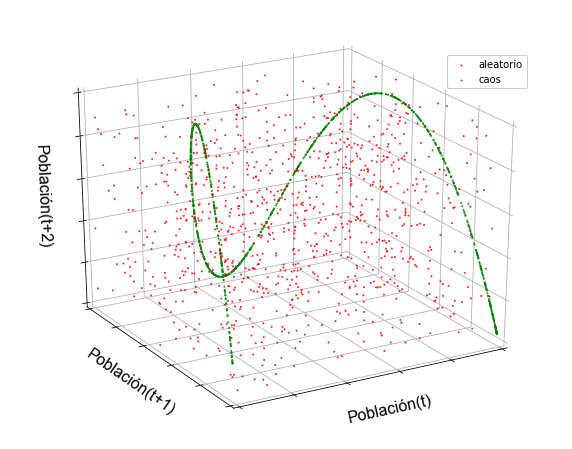

In [13]:
# plot same data as 3D phase diagram instead
phase_diagram_3d(pops, color=['r','g'], filename='logistic-attractor-chaos-random-3d',
                 legend=True, legend_bbox_to_anchor=(0.94, 0.9), xlabel='Población(t)', ylabel='Población(t+1)', 
                zlabel='Población(t+2)')